<a href="https://colab.research.google.com/github/ivynasantino/vies-discursos-deputados/blob/master/reports/discursos_w2v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import gensim
import nltk
from nltk.corpus import stopwords

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/ivynasantino/vies-discursos-deputados/master/data/all_discursos.csv")
df.head()

,data,autor,partido,uf,discurso
0,09/04/2019,FELIPE FRANCISCHINI,PSL,PR,"Havendo número regimental, declaro aberta a pr..."
1,09/04/2019,AFONSO MOTTA,PDT,RS,"Questão de ordem, Sr. Presidente."
2,09/04/2019,FELIPE FRANCISCHINI,PSL,PR,Questão de ordem do Deputado Afonso Motta.
3,09/04/2019,AFONSO MOTTA,PDT,RS,"Sr. Presidente, o fundamento da minha questão ..."
4,09/04/2019,FELIPE FRANCISCHINI,PSL,PR,"Só um minuto, Deputado. Deputados, por favor, ..."


In [49]:
df.shape

(9352, 5)

In [50]:
nltk.download('stopwords')

# removendo stopwords
default_stopwords = set(stopwords.words('portuguese'))
stopwords_complement = ["", "neste","és", "é", "somos", "sois", "são", "era", "eras", "éreis", "foste", "fostes", "foras",	"fôreis",	"serás", "sereis", "serão",	"serias", "seríeis", "sejas", "sejais", "fosses", "fôsseis", "fores", "fordes", "sê", "sejas", "sejais", "ser", "seres", "sermos",	"serdes",	"serem", "sobre", "é"]

stopwords_complement.extend(default_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def read_questions(row,column_name):
    return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))
    
documents = []
for index, row in df.iterrows():
  itens = read_questions(row, "discurso")
  lista = []
  for i in itens:
    if len(i) > 3 and i not in stopwords_complement:
      lista.append(i)
 
  documents.append(lista)

In [52]:
print("List of lists. Let's confirm: ", type(documents), " of ", type(documents[0]))

List of lists. Let's confirm:  <class 'list'>  of  <class 'list'>


In [0]:
model = gensim.models.Word2Vec(size=150, window=10, min_count=2, sg=1, workers=10)
model.build_vocab(documents)

In [54]:
model.train(sentences=documents, total_examples=len(documents), epochs=model.iter)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


(2113602, 2485005)

In [0]:
word_vectors = model.wv
count = 0
for word in word_vectors.vocab:
    if count<10:
        count += 1
    else:
        break

In [56]:
len(word_vectors.vocab)

14800

In [57]:
vector = model.wv["previdência"] 
len(vector)

150

In [58]:
wanted_words = []
count = 0
for word in word_vectors.vocab:
    if count<150:
        wanted_words.append(word)
        count += 1
    else:
        break
wanted_vocab = dict((k, word_vectors.vocab[k]) for k in wanted_words if k in word_vectors.vocab)
wanted_vocab

{'aberta': <gensim.models.keyedvectors.Vocab at 0x7ff15ce76208>,
 'aceitar': <gensim.models.keyedvectors.Vocab at 0x7ff15d6591d0>,
 'acolhida': <gensim.models.keyedvectors.Vocab at 0x7ff15746de80>,
 'afonso': <gensim.models.keyedvectors.Vocab at 0x7ff15d34fc18>,
 'alteração': <gensim.models.keyedvectors.Vocab at 0x7ff15d6d9828>,
 'antônio': <gensim.models.keyedvectors.Vocab at 0x7ff15746ae80>,
 'análise': <gensim.models.keyedvectors.Vocab at 0x7ff15d6d9240>,
 'apenas': <gensim.models.keyedvectors.Vocab at 0x7ff15746d198>,
 'apreciação': <gensim.models.keyedvectors.Vocab at 0x7ff15d63d5f8>,
 'apresentados': <gensim.models.keyedvectors.Vocab at 0x7ff15746d2e8>,
 'apresentando': <gensim.models.keyedvectors.Vocab at 0x7ff15746dcf8>,
 'apresentar': <gensim.models.keyedvectors.Vocab at 0x7ff15746dba8>,
 'apresento': <gensim.models.keyedvectors.Vocab at 0x7ff15d6d9320>,
 'após': <gensim.models.keyedvectors.Vocab at 0x7ff15d6d9748>,
 'aqui': <gensim.models.keyedvectors.Vocab at 0x7ff157463780>

In [0]:
X = model[wanted_vocab] 
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


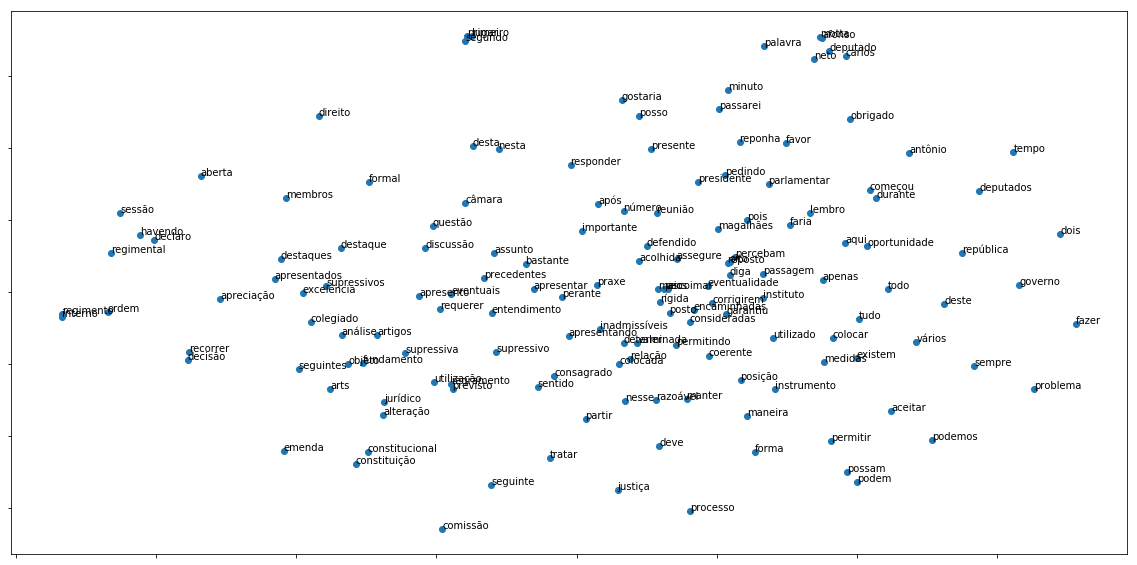

In [59]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(wanted_vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([]) 
_ = plt.show()

In [61]:
w1 = ["previdência"]
#w2 = ["previdência"]
model.wv.most_similar(positive=w1,topn=15)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('regressiva', 0.6996729373931885),
 ('reforma', 0.6856462955474854),
 ('digam', 0.6737965941429138),
 ('solidária', 0.6696075797080994),
 ('toque', 0.6669619679450989),
 ('falava', 0.6643814444541931),
 ('recai', 0.6641084551811218),
 ('robusta', 0.6618495583534241),
 ('aderir', 0.6610877513885498),
 ('destrói', 0.6588357090950012),
 ('perguntam', 0.6582727432250977),
 ('discordo', 0.6570209860801697),
 ('reformar', 0.6560001969337463),
 ('bondades', 0.6530451774597168),
 ('desmontar', 0.6529466509819031)]